<a href="https://colab.research.google.com/github/himanshkr03/Phone_usage_Project/blob/main/Phone_Usage_Analysis_rpaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load the dataset
data = pd.read_csv('/content/phone_usage_india.csv')  # Replace 'dataset.csv' with your file name

# Inspect the dataset
print(data.head())
print(data.info())
print(data.describe())


  User ID  Age  Gender   Location Phone Brand       OS  Screen Time (hrs/day)  \
0  U00001   53    Male     Mumbai        Vivo  Android                    3.7   
1  U00002   60   Other      Delhi      Realme      iOS                    9.2   
2  U00003   37  Female  Ahmedabad       Nokia  Android                    4.5   
3  U00004   32    Male       Pune     Samsung  Android                   11.0   
4  U00005   16    Male     Mumbai      Xiaomi      iOS                    2.2   

   Data Usage (GB/month)  Calls Duration (mins/day)  Number of Apps Installed  \
0                   23.9                       37.9                       104   
1                   28.1                       13.7                       169   
2                   12.3                       66.8                        96   
3                   25.6                      156.2                       146   
4                    2.5                      236.2                        86   

   Social Media Time (hrs/

In [4]:
print(data.isnull().sum())
data.fillna(method='ffill', inplace=True)  # Forward fill as an example


User ID                         0
Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64


<ipython-input-4-4566882a8644>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill as an example


In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: 'U00001'

<Figure size 1000x800 with 0 Axes>

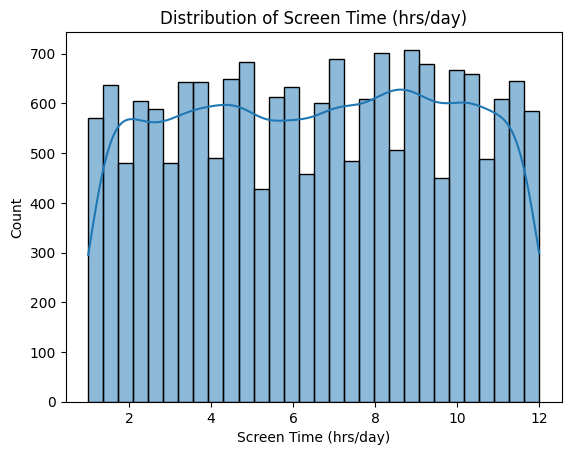

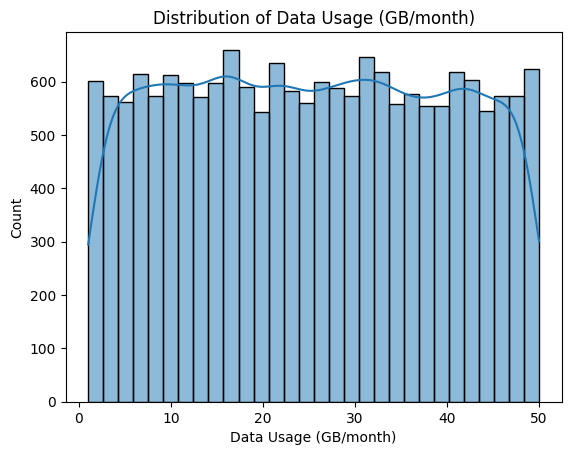

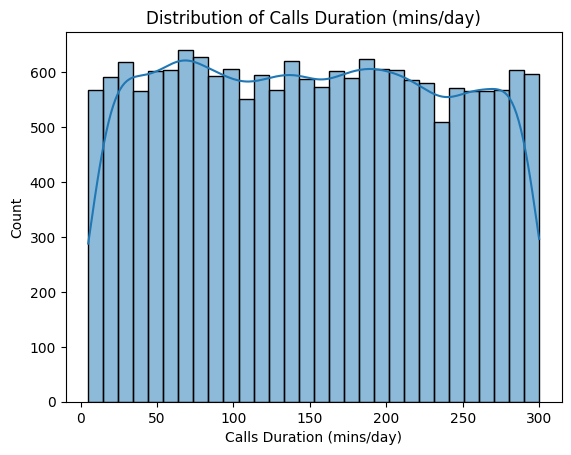

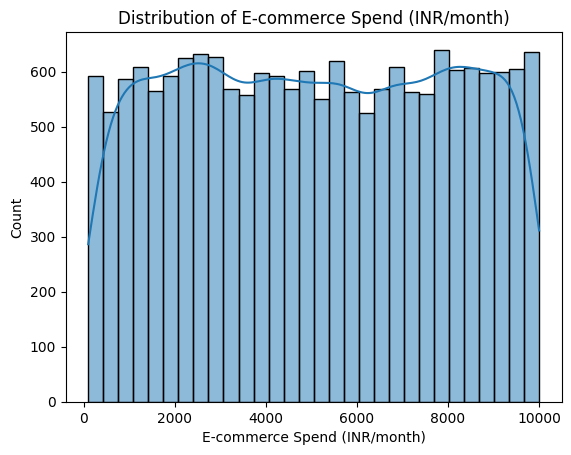

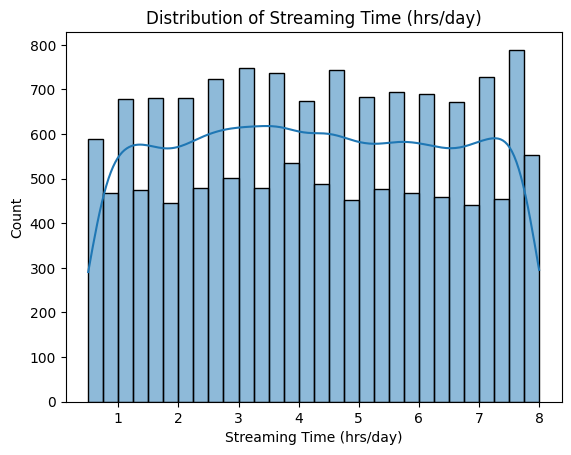

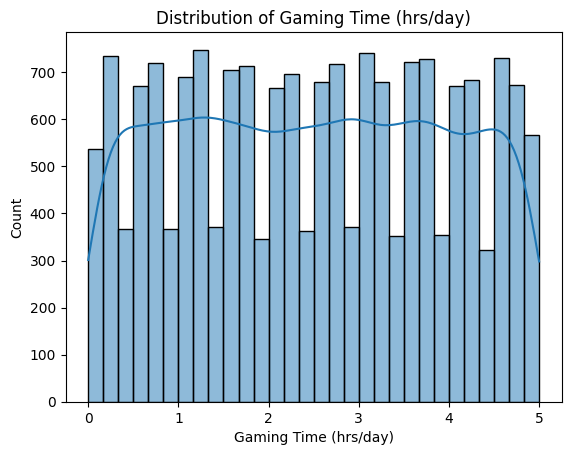

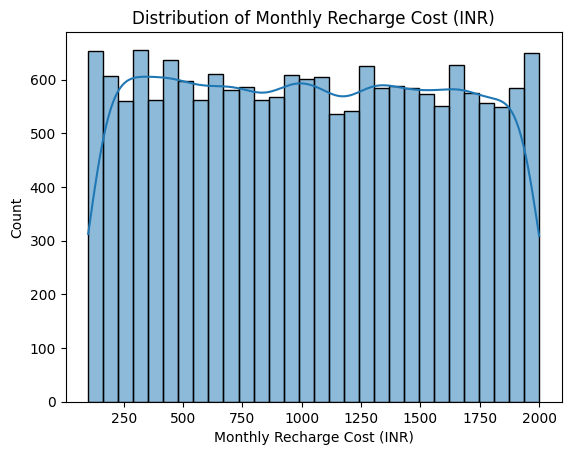

In [7]:
num_cols = ['Screen Time (hrs/day)', 'Data Usage (GB/month)',
            'Calls Duration (mins/day)', 'E-commerce Spend (INR/month)',
            'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
            'Monthly Recharge Cost (INR)']

for col in num_cols:
    plt.figure()
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


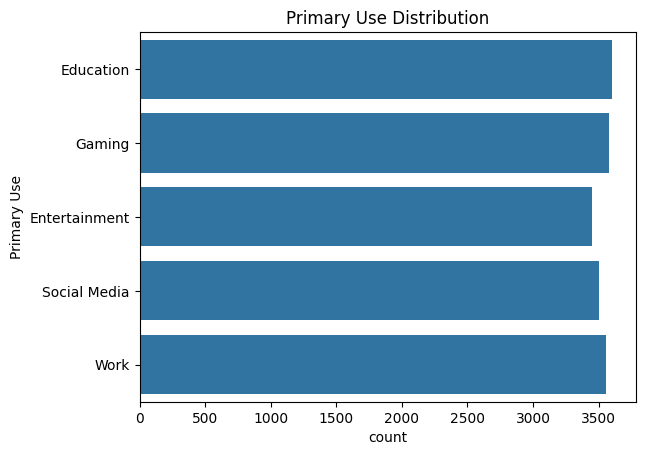

In [8]:
sns.countplot(data['Primary Use'])
plt.title('Primary Use Distribution')
plt.show()


In [9]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['OS'] = data['OS'].map({'Android': 0, 'iOS': 1})  # Example encoding


In [10]:
data['Usage Intensity'] = data['Screen Time (hrs/day)'] * data['Data Usage (GB/month)']


In [11]:
data['Social_Streaming_Ratio'] = data['Social Media Time (hrs/day)'] / (data['Streaming Time (hrs/day)'] + 1)


In [13]:
X = data.drop(['Monthly Recharge Cost (INR)', 'Primary Use'], axis=1)
y = data['Monthly Recharge Cost (INR)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
